In [1]:
# This demo draws heavily from the handwritten digit example in
# Chapter 2 of Francois Chollet's "Deep Learning with Python" book.
# I've added a simpler single-layer example first before moving to
# the 2-layer example. -George Chen (CMU Fall 2017)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/Users/georgehc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/georgehc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(test_images.shape)

(10000, 28, 28)


In [4]:
flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels) #one-hot encoding
test_labels_categorical = to_categorical(test_labels)

In [5]:
train_labels[0]

5

In [6]:
train_labels_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [7]:
print(flattened_train_images.shape)

(60000, 784)


(-0.5, 27.5, 27.5, -0.5)

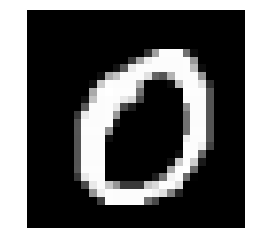

In [8]:
# this plots out one of the training images
idx = np.random.randint(len(train_images))  # random training image index
plt.imshow(train_images[idx], cmap='gray')
plt.axis('off')

(-0.5, 9.5, 783.5, -0.5)

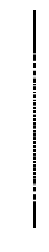

In [9]:
# this is just to visualize what the flattened version of the image above looks like;
# after flattening the image I replicate it horizontally (by 10 pixels) just for
# visualization purposes since otherwise the image is so thin (horizontally) that
# it's not easy to see anything
plt.imshow(np.hstack([train_images[idx].flatten().reshape((784,1))]*10), cmap='gray')
plt.axis('off')

In [10]:
# extremely shallow single-layer model
shallow_single_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
shallow_single_layer_model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))
#only need to specify the input_shape for the first layer
shallow_single_layer_model.summary()
#Params=7,850 = 784*10(weight) + 10(bias)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
shallow_single_layer_model.compile(optimizer='rmsprop',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

In [12]:
shallow_single_layer_model.fit(flattened_train_images, #feature vector
                               train_labels_categorical, #categorical version of labels
                               epochs=5, #how many time to run through the training data
                               batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.6023 - acc: 0.8497
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3312 - acc: 0.9083
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.3019 - acc: 0.9161
Epoch 4/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2884 - acc: 0.9193
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2802 - acc: 0.9223


In [13]:
test_loss, test_acc = shallow_single_layer_model.evaluate(flattened_test_images,
                                                          test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.9223


In [14]:
# two-layer model
two_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
two_layer_model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
two_layer_model.add(layers.Dense(10, activation='softmax'))
two_layer_model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
two_layer_model.fit(flattened_train_images,
                    train_labels_categorical,
                    epochs=5,
                    batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.2534 - acc: 0.9275
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.1009 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0674 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0493 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0359 - acc: 0.9892


In [16]:
test_loss, test_acc = two_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/step
Test accuracy: 0.9805
